# Project 4: Wrangle and Analyze `WeRateDogs` Data 

In [1]:
import os 
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Gather

- Download `twitter_archive_enhanced.csv` directly and import it using pandas.read_csv function.
- Download `image_predictions.tsv` programmatically using the <a href="https://pypi.org/project/requests/">Requests</a> library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv ,and import it using pandas.read_csv function.
- Using the tweet IDs in `twitter_archive_enhanced.csv`, query the Twitter API for each tweet's JSON data using Python's <a href="http://www.tweepy.org/" >Tweepy</a> library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` ,then read the file and, create a new dataframe using pandas and append JSON data in it.

In [2]:
folder_name = 'material'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response  #.text

<Response [200]>

In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='w') as file:
    file.write(response.text)

In [5]:
df_list = []
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
for p in data['tweet']:
    df_list.append({'tweet_id':p['id'],
                    'retweet_count':p['retweet_count'],
                    'favorite_count':p['favorite_count']})
    
#df_gather = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])

In [6]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_2 = pd.read_csv('material\image-predictions.tsv', sep='\t')
df_3 = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])

## Assess

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1743 non-null   int64
 1   retweet_count   1743 non-null   int64
 2   favorite_count  1743 non-null   int64
dtypes: int64(3)
memory usage: 41.0 KB


In [10]:
df_1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [11]:
df_2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [12]:
df_3.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7689,36109
1,892177421306343426,5688,31149
2,891815181378084864,3771,23460


## Quality:
##### `df_1`  table represents `twitter-archive-enhanced.csv` :
- number of rows must be matched with number of rows in `df_3` table which represents `tweet_json.txt` which has 1743 rows
- 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' in `df_1` table should be dropped as number of Nan values are too large and cannot be retrieved using pandas drop function
- some rating_numerator values have decimal part inside text column but these values appear as integer without decimal part in rating_numerator. so, we will extract the full rating from text column in new full_rating column, then extract rating_numerator and assign these values in rating_numerator column.
- fix rating_numerator and rating_denominator columns: 99/90 = 11/10, 143/130 = 11/10 and so on
- more fix in rating_numerator and rating_denominator columns: 7/11 ~ 7/10 and 24/7 ~ 34/10
- check source column in `df_1` for categorical values

##### `df_2`  table represents `image-predictions.tsv` :
- rows which have at least one true prediction should be chosen and drop all rows that have three false predictions 
- number of rows must be matched with number of rows in `df_3` table which represents `tweet_json.txt` which has 1743 rows
- tweet_id should be sort in descending order to be matched with tweet_id order in `df_1` and `df_3` and reset index to match index in `df_1` and `df_3`

#### Reassess and Re-Clean :
- number of rows in `df_1` must be matched with number of rows in `df_2` table which has 1304 rows
- number of rows in `df_3` must be matched with number of rows in `df_2` table which has 1304 rows
- reset index for all tables

## Tidiness :
- six variables in six columns in `df_2` table ('p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'), we will replace these variables with three columns represent breed of dog , confidance of alogrithm and chosen algorithm
- five variables in four columns in `df_1` table (doggo, floofer, pupper, puppo and None), we will create one column for stages by extract each stage alone then combine them in column represents all stages
- - `df_1_clean`, `df_2_clean` and `df_3_clean` will be merged together in one dataframe `df_final` and stored in `twitter_archive_master.csv`

## Quality and Tidness for `df_final` table represents `twitter_archive_master.csv` :
- tweet_id is a float not a string using .astype function
- time stamp column is object not time type
- we need to change type of stages of dog, image number,breed of dog and chosen algorithm to category
- check 'expanded_urls' and 'jpg_url' columns 
- re-index columns as we make our analysis more helpful
- adjust variables in img_num and prediction_algorithm columns

## Clean

In [13]:
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

#### Define

- tweet_id should be sort in descending order to be matched with tweet_id order in `df_1` and `df_3`
- reset index to match index in `df_1` and `df_3`

#### Code

In [14]:
df_2_clean = df_2_clean.sort_values(by='tweet_id',ascending=False)

In [15]:
df_2_clean.reset_index(drop=True, inplace=True)

#### Test

In [16]:
df_2_clean.tweet_id.head(3)

0    892420643555336193
1    892177421306343426
2    891815181378084864
Name: tweet_id, dtype: int64

In [17]:
df_1_clean.tweet_id.head(3)

0    892420643555336193
1    892177421306343426
2    891815181378084864
Name: tweet_id, dtype: int64

In [18]:
df_3_clean.tweet_id.head(3)

0    892420643555336193
1    892177421306343426
2    891815181378084864
Name: tweet_id, dtype: int64

#### Define

- number of rows in `df_1` must be matched with number of rows in `df_3` table which represents `tweet_json.txt`

#### Code

In [19]:
df_1_clean = df_1_clean[df_1_clean.tweet_id.isin(df_3_clean.tweet_id)]

#### Test

In [20]:
print(df_1_clean.shape[0])
print(df_3_clean.shape[0])

1743
1743


#### Define

- number of rows in `df_2` must be matched with number of rows in `df_3` table which represents `tweet_json.txt`

#### Code

In [21]:
df_2_clean = df_2_clean[df_2_clean.tweet_id.isin(df_3_clean.tweet_id)]

#### Test

In [22]:
print(df_2_clean.shape[0])
print(df_3_clean.shape[0])

1506
1743


In [23]:
df_2_clean.tweet_id.head(3)

0    892420643555336193
1    892177421306343426
2    891815181378084864
Name: tweet_id, dtype: int64

In [24]:
# df_3[df_3.tweet_id.isin(df_2.tweet_id)].shape[0]

#### Define

- rows which have at least one true prediction should be chosen and drop all row that have three false predictions

#### Code

In [25]:
df_2_clean = df_2_clean[ (df_2_clean.p1_dog) | (df_2_clean.p2_dog) | (df_2_clean.p3_dog) ]

#### Test

In [26]:
df_2_clean.p2_dog.unique()

array([ True, False])

In [27]:
df_2_clean.shape[0]

1304

In [28]:
df_3_clean.shape[0]

1743

In [29]:
df_1_clean.shape[0]

1743

## Reassess and Re-Clean
- number of rows in `df_1` must be matched with number of rows in `df_2` table which has 1304 rows
- number of rows in `df_3` must be matched with number of rows in `df_2` table which has 1304 rows

#### Code

In [30]:
df_1_clean = df_1_clean[df_1_clean.tweet_id.isin(df_2_clean.tweet_id)]
df_3_clean = df_3_clean[df_3_clean.tweet_id.isin(df_2_clean.tweet_id)]

#### Test

In [31]:
print(df_1_clean.shape[0])
print(df_2_clean.shape[0])
print(df_3_clean.shape[0])

1304
1304
1304


#### Define

- six variables in six columns in `df_2` table ('p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'), we will replace these variables with three columns represent breed of dog , confidance of alogrithm and chosen algorithm

#### Code

In [32]:
df_2_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [33]:
df_2_p1 = df_2_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']]
df_2_p2 = df_2_clean[['tweet_id', 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog']]
df_2_p3 = df_2_clean[['tweet_id', 'jpg_url', 'img_num', 'p3', 'p3_conf', 'p3_dog']]

In [34]:
df_2_p1 = df_2_p1.rename(columns={'p1':'p','p1_conf':'p_conf','p1_dog':'p_dog'})
df_2_p2 = df_2_p2.rename(columns={'p2':'p','p2_conf':'p_conf','p2_dog':'p_dog'})
df_2_p3 = df_2_p3.rename(columns={'p3':'p','p3_conf':'p_conf','p3_dog':'p_dog'})

In [35]:
df_2_p1 = df_2_p1[df_2_p1.p_dog]
df_2_p2 = df_2_p2[df_2_p2.p_dog]
df_2_p3 = df_2_p3[df_2_p3.p_dog]

In [36]:
df_2_p1['prediction_algorithm'] = 'p1'
df_2_p2['prediction_algorithm'] = 'p2'
df_2_p3['prediction_algorithm'] = 'p3'

In [37]:
df_2_p1.head(3)

,tweet_id,jpg_url,img_num,p,p_conf,p_dog,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,p1
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,p1
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,p1


In [38]:
df_2_p2.head(3)

,tweet_id,jpg_url,img_num,p,p_conf,p_dog,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Pekinese,0.090647,True,p2
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,malamute,0.078253,True,p2
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,True,p2


In [39]:
df_2_p3.head(3)

,tweet_id,jpg_url,img_num,p,p_conf,p_dog,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,papillon,0.068957,True,p3
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,kelpie,0.031379,True,p3
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German_short-haired_pointer,0.175219,True,p3


In [40]:
dummy = pd.concat([df_2_p1,df_2_p2,df_2_p3])

In [41]:
dummy.head(1)

,tweet_id,jpg_url,img_num,p,p_conf,p_dog,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,p1


In [42]:
max_conf = dummy.groupby('tweet_id', as_index=False)['p_conf'].max()
max_conf.p_conf

0       0.952773
1       0.420155
2       0.582560
3       0.412362
4       0.292343
          ...   
1299    0.425595
1300    0.555712
1301    0.168086
1302    0.716012
1303    0.323581
Name: p_conf, Length: 1304, dtype: float64

In [43]:
dummy = dummy[dummy.p_conf.isin(max_conf.p_conf)]
dummy.sort_values('tweet_id', ascending=False) 

,tweet_id,jpg_url,img_num,p,p_conf,p_dog,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,p1
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,p1
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,True,p2
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,p1
5,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,p1
...,...,...,...,...,...,...,...
1707,672964561327235073,https://pbs.twimg.com/media/CVbZsouWUAIsxMc.jpg,1,Chihuahua,0.292343,True,p1
1711,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,p1
1712,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,Pembroke,0.582560,True,p1
1714,672640509974827008,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,1,Chesapeake_Bay_retriever,0.420155,True,p1


In [44]:
dummy = dummy.sort_values('tweet_id', ascending=False)
dummy.head(5)

,tweet_id,jpg_url,img_num,p,p_conf,p_dog,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,p1
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,p1
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,True,p2
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,p1
5,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,p1


In [45]:
df_2_clean = dummy.copy()

In [46]:
df_2_clean.drop(['p_dog'], axis=1, inplace=True)

In [47]:
df_2_clean = df_2_clean.rename(columns={'p':'dog_breed','p_conf':'algorithm_conf'})

#### Test

In [48]:
df_2_clean.head(3)

,tweet_id,jpg_url,img_num,dog_breed,algorithm_conf,prediction_algorithm
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,p1
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,p1
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,p2


#### Define

- 'in_reply_to_status_id' , 'in_reply_to_user_id' , 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' in `df_1` table should be dropped as number of Nan values are too large and cannot be retrieved using pandas drop function

#### code

In [49]:
drop_list = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
             'retweeted_status_timestamp']

In [50]:
df_1_clean.drop(drop_list, axis=1, inplace=True)

#### Test

In [51]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 1 to 1991
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1304 non-null   int64 
 1   timestamp           1304 non-null   object
 2   source              1304 non-null   object
 3   text                1304 non-null   object
 4   expanded_urls       1304 non-null   object
 5   rating_numerator    1304 non-null   int64 
 6   rating_denominator  1304 non-null   int64 
 7   name                1304 non-null   object
 8   doggo               1304 non-null   object
 9   floofer             1304 non-null   object
 10  pupper              1304 non-null   object
 11  puppo               1304 non-null   object
dtypes: int64(3), object(9)
memory usage: 132.4+ KB


In [52]:
print(sum(df_1_clean.duplicated()))
print(sum(df_2_clean.duplicated()))
print(sum(df_3_clean.duplicated()))

0
0
0


#### Define

- five variables in four columns in `df_1` table (doggo, floofer, pupper, puppo and None), we will create one column for stages by extract each stage alone then combine them in column represents all stages

#### Code

In [53]:
df_1_woof = df_1_clean[ df_1_clean.text.str.contains('woof', case=False) & \
           (~ df_1_clean.text.str.contains('pup|pupper|puppo|floofer|doggo', case=False)) ].copy()

In [54]:
df_1_doggo = df_1_clean[ df_1_clean.text.str.contains('doggo', case=False) & \
           (~ df_1_clean.text.str.contains('pup|pupper|puppo|floofer|woof', case=False)) ].copy()

In [55]:
df_1_floofer = df_1_clean[ df_1_clean.text.str.contains('floofer', case=False) & \
           (~ df_1_clean.text.str.contains('pup|pupper|puppo|woof', case=False)) ].copy()

In [56]:
df_1_pup = df_1_clean[ df_1_clean.text.str.contains('pup|pupper|puppo', case=False)].copy()

In [57]:
df_1_unclassified = df_1_clean[~ df_1_clean.text.str.contains('pup|pupper|puppo|floofer|woof|doggo', case=False)].copy()

In [58]:
df_1_unclassified['stage'] = 'unclassified'
df_1_woof['stage'] = 'woof'
df_1_doggo['stage'] = 'doggo'
df_1_floofer['stage'] = 'floofer'
df_1_pup['stage'] = 'pup'

In [59]:
df_1_clean = pd.concat([df_1_unclassified, df_1_woof, df_1_doggo, df_1_floofer, df_1_pup])
df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_1_clean = df_1_clean.sort_values('tweet_id', ascending=False)

#### Test

In [60]:
print('unclassified    ', df_1_unclassified.shape[0])
print('pup             ',df_1_pup.shape[0])
print('doggo           ',df_1_doggo.shape[0])
print('floofer         ',df_1_floofer.shape[0])
print('woof            ',df_1_woof.shape[0])

unclassified     908
pup              346
doggo            41
floofer          5
woof             4


In [61]:
df_1_clean.stage.value_counts()

unclassified    908
pup             346
doggo            41
floofer           5
woof              4
Name: stage, dtype: int64

In [62]:
df_1_clean.text[1990]

'This is Leonidas. He just got rekt by a snowball. 9/10 doggy down https://t.co/uNrmYDUa9M'

#### Define

- reset index for all tables

#### Code

In [63]:
df_1_clean.reset_index(drop=True, inplace=True)
df_2_clean.reset_index(drop=True, inplace=True)
df_3_clean.reset_index(drop=True, inplace=True)

#### Test

In [64]:
print(df_1_clean.shape[0])
print(df_2_clean.shape[0])
print(df_3_clean.shape[0])

1304
1304
1304


In [65]:
print(df_1_clean.tweet_id[0])
print(df_2_clean.tweet_id[0])
print(df_3_clean.tweet_id[0])

892177421306343426
892177421306343426
892177421306343426


## Reassess and Re-Clean

#### Define

- some rating_numerator values have decimal part inside text column but these values appear as integer without decimal part in rating_numerator. so, we will extract the full rating from text column in new full_rating column, then extract rating_numerator and assign these values in rating_numerator column.

In [66]:
df_1_clean[df_1_clean.text.str.contains("(\d+\.\d*\/\d+)")].text.str[75:]

C:\Users\El Zahraa\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


37      ring you her favorite monkey. 13.5/10 https://...
489     od. H*ckin magical af 9.75/10 https://t.co/yBO...
538      random just to smile at the locals. 11.27/10 ...
1090                      1.26/10 https://t.co/eNm2S6p9BD
Name: text, dtype: object

#### Code

In [67]:
df_1_clean['full_rating'] = df_1_clean.text.str.extract("(\d+?\.?\d*\/\d+)")
df_1_clean['rating_numerator'] = df_1_clean.full_rating.apply(lambda x: x.split('/')[0]).astype('float')

#### Test

In [68]:
df_1_clean['full_rating'][37]

'13.5/10'

In [69]:
df_1_clean['rating_numerator'][37]

13.5

In [70]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1304 non-null   int64  
 1   timestamp           1304 non-null   object 
 2   source              1304 non-null   object 
 3   text                1304 non-null   object 
 4   expanded_urls       1304 non-null   object 
 5   rating_numerator    1304 non-null   float64
 6   rating_denominator  1304 non-null   int64  
 7   name                1304 non-null   object 
 8   stage               1304 non-null   object 
 9   full_rating         1304 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 102.0+ KB


#### Define

- fix rating_numerator and rating_denominator columns: 99/90 = 11/10, 143/130 = 11/10 and so on

#### code

In [71]:
df_1_clean['full_rating'].value_counts()

12/10       382
11/10       277
10/10       230
13/10       221
9/10         83
8/10         33
14/10        25
7/10         13
5/10          7
6/10          7
3/10          4
4/10          2
45/50         1
88/80         1
44/40         1
9.75/10       1
11.27/10      1
4/20          1
84/70         1
143/130       1
50/50         1
24/7          1
11.26/10      1
144/120       1
13.5/10       1
80/80         1
99/90         1
121/110       1
2/10          1
0/10          1
60/50         1
7/11          1
Name: full_rating, dtype: int64

In [72]:
df_1_clean.rating_denominator.replace([20,40,50,70,80,90,110,120,130], 10, inplace=True)

In [73]:
change = {2:4, 9:45, 10:[50,80], 11:[44,88,99,121,143], 12:[60,84,144]}

In [74]:
for x in change.keys():
    df_1_clean.rating_numerator.replace(change[x], x, inplace=True)

#### Test

In [75]:
(df_1_clean.rating_numerator.astype('str') + '/' + df_1_clean.rating_denominator.astype('str')).value_counts()

12.0/10     385
11.0/10     282
10.0/10     232
13.0/10     221
9.0/10       84
8.0/10       33
14.0/10      25
7.0/10       13
5.0/10        7
6.0/10        7
3.0/10        4
2.0/10        4
24.0/7        1
7.0/11        1
11.26/10      1
13.5/10       1
9.75/10       1
11.27/10      1
0.0/10        1
dtype: int64

## Reassess and Re-Clean

In [76]:
df_1_clean[ (df_1_clean.index == 361) | (df_1_clean.index == 1056) ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,full_rating
361,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,unclassified,24/7
1056,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11,Darrel,unclassified,7/11


#### Define

- more fix in rating_numerator and rating_denominator columns: 7/11 ~ 7/10 and 24/7 ~ 34/10

#### Code

In [77]:
df_1_clean.rating_numerator.replace(24, 34, inplace=True)
df_1_clean.rating_denominator.replace({11:10, 7:10}, inplace=True)

#### Test

In [78]:
df_1_clean[ (df_1_clean.index == 361) | (df_1_clean.index == 1056) ]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,full_rating
361,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",34.0,10,Sam,unclassified,24/7
1056,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,10,Darrel,unclassified,7/11


In [79]:
(df_1_clean.rating_numerator.astype('str') + '/' + df_1_clean.rating_denominator.astype('str')).value_counts()

12.0/10     385
11.0/10     282
10.0/10     232
13.0/10     221
9.0/10       84
8.0/10       33
14.0/10      25
7.0/10       14
6.0/10        7
5.0/10        7
2.0/10        4
3.0/10        4
0.0/10        1
11.26/10      1
9.75/10       1
13.5/10       1
34.0/10       1
11.27/10      1
dtype: int64

#### Define
- column full_rating after fixing all issues

#### Code

In [80]:
df_1_clean.full_rating = df_1_clean.rating_numerator.astype('str') + '/' + df_1_clean.rating_denominator.astype('str')

In [81]:
df_1_clean.full_rating.value_counts()

12.0/10     385
11.0/10     282
10.0/10     232
13.0/10     221
9.0/10       84
8.0/10       33
14.0/10      25
7.0/10       14
6.0/10        7
5.0/10        7
2.0/10        4
3.0/10        4
0.0/10        1
11.26/10      1
9.75/10       1
13.5/10       1
34.0/10       1
11.27/10      1
Name: full_rating, dtype: int64

In [82]:
df_1_clean.full_rating.replace({'0.0/10':'0/10','2.0/10':'2/10','3.0/10':'3/10','5.0/10':'5/10','6.0/10':'6/10','7.0/10':'7/10',
                                '8.0/10':'8/10','9.0/10':'9/10','10.0/10':'10/10','11.0/10':'11/10','12.0/10':'12/10',
                                '13.0/10':'13/10','14.0/10':'14/10'}, inplace=True)

#### Test

In [83]:
df_1_clean.full_rating.value_counts()

12/10       385
11/10       282
10/10       232
13/10       221
9/10         84
8/10         33
14/10        25
7/10         14
6/10          7
5/10          7
2/10          4
3/10          4
9.75/10       1
34.0/10       1
13.5/10       1
11.26/10      1
0/10          1
11.27/10      1
Name: full_rating, dtype: int64

#### Define

- drop rating_denominator column as all values are set to 10 so we don't need that column

#### Code

In [84]:
df_1_clean.rating_denominator.unique()

array([10], dtype=int64)

In [85]:
df_1_clean.drop(['rating_denominator'],  axis=1, inplace=True)

#### Test

In [86]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1304 non-null   int64  
 1   timestamp         1304 non-null   object 
 2   source            1304 non-null   object 
 3   text              1304 non-null   object 
 4   expanded_urls     1304 non-null   object 
 5   rating_numerator  1304 non-null   float64
 6   name              1304 non-null   object 
 7   stage             1304 non-null   object 
 8   full_rating       1304 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 91.8+ KB


#### Define

- check source column in `df_1` for categorical values

#### Code

In [87]:
df_1_clean.source[0]  #str.split('>')[0][1][:-3]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [88]:
df_1_clean.source.apply(lambda x: x.split('>')[1][:-3]).value_counts().to_frame()

,source
Twitter for iPhone,1297
Twitter Web Client,5
TweetDeck,2


- as 'twitter for iphone' is the dominant category in source column, we can drop this column as it won't have influence in our analysis later

In [89]:
df_1_clean.drop(['source'], axis=1, inplace=True)

#### Test

In [90]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1304 non-null   int64  
 1   timestamp         1304 non-null   object 
 2   text              1304 non-null   object 
 3   expanded_urls     1304 non-null   object 
 4   rating_numerator  1304 non-null   float64
 5   name              1304 non-null   object 
 6   stage             1304 non-null   object 
 7   full_rating       1304 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 81.6+ KB


#### Define

- `df_1_clean`, `df_2_clean` and `df_3_clean` will be merged together in one dataframe `df_final` and stored in `twitter_archive_master.csv`

#### Code

In [91]:
from functools import reduce

dfs = [df_1_clean, df_2_clean, df_3_clean]

In [92]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

#### Test

In [93]:
df_final.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stage,full_rating,jpg_url,img_num,dog_breed,algorithm_conf,prediction_algorithm,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,pup,13/10,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,p1,5688,31149
1,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,unclassified,12/10,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,p1,3771,23460
2,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,unclassified,13/10,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,p2,7855,39394


In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1304 non-null   int64  
 1   timestamp             1304 non-null   object 
 2   text                  1304 non-null   object 
 3   expanded_urls         1304 non-null   object 
 4   rating_numerator      1304 non-null   float64
 5   name                  1304 non-null   object 
 6   stage                 1304 non-null   object 
 7   full_rating           1304 non-null   object 
 8   jpg_url               1304 non-null   object 
 9   img_num               1304 non-null   int64  
 10  dog_breed             1304 non-null   object 
 11  algorithm_conf        1304 non-null   float64
 12  prediction_algorithm  1304 non-null   object 
 13  retweet_count         1304 non-null   int64  
 14  favorite_count        1304 non-null   int64  
dtypes: float64(2), int64(

#### Define

#### `df_final` table :
- tweet_id is a float not a string using .astype function
- time stamp column is object not time type
- we need to change type of stages of dog, image number, breed of dog and chosen algorithm to category
- check 'expanded_urls' and 'jpg_url' columns
- re-index columns as we make our analysis more helpful
- adjust variables in img_num and prediction_algorithm columns

#### code

In [95]:
df_final.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'name', 'stage', 'full_rating', 'jpg_url', 'img_num', 'dog_breed',
       'algorithm_conf', 'prediction_algorithm', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [96]:
df_final[['tweet_id','img_num']] = df_final[['tweet_id','img_num']].astype('str')
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])
df_final.img_num.replace({'1':'img_1','2':'img_2','2':'img_2','3':'img_3','4':'img_4'}, inplace=True)
df_final.prediction_algorithm.replace({'p1':'P_1','p2':'P_2','p3':'P_3'}, inplace=True)
df_final[['stage','img_num','dog_breed','prediction_algorithm']]= df_final[['stage','img_num','dog_breed',
                                                                            'prediction_algorithm']].astype('category')

#### after investigation, we found that 'expanded_urls' and 'jpg_url' columns represent same variable so we will drop one of them

In [97]:
print(df_final.expanded_urls[1303])
print(df_final.jpg_url[1303])

https://twitter.com/dog_rates/status/672622327801233409/photo/1
https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg


In [98]:
df_final.drop(['expanded_urls'], axis=1, inplace=True)

In [99]:
required_columns = ['tweet_id','timestamp','text','jpg_url','name','stage','dog_breed','img_num','algorithm_conf'
                    ,'prediction_algorithm','full_rating','rating_numerator','retweet_count','favorite_count']
df_final = df_final.reindex(columns=required_columns)

#### Test

In [100]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1304 non-null   object             
 1   timestamp             1304 non-null   datetime64[ns, UTC]
 2   text                  1304 non-null   object             
 3   jpg_url               1304 non-null   object             
 4   name                  1304 non-null   object             
 5   stage                 1304 non-null   category           
 6   dog_breed             1304 non-null   category           
 7   img_num               1304 non-null   category           
 8   algorithm_conf        1304 non-null   float64            
 9   prediction_algorithm  1304 non-null   category           
 10  full_rating           1304 non-null   object             
 11  rating_numerator      1304 non-null   float64            
 12  retwee

In [101]:
df_final.head(2)

,tweet_id,timestamp,text,jpg_url,name,stage,dog_breed,img_num,algorithm_conf,prediction_algorithm,full_rating,rating_numerator,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Tilly,pup,Chihuahua,img_1,0.323581,P_1,13/10,13.0,5688,31149
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Archie,unclassified,Chihuahua,img_1,0.716012,P_1,12/10,12.0,3771,23460


## Store Dataframe in `twitter_archive_master.csv`:

In [102]:
df_final.to_csv('twitter_archive_master.csv', index=False)

# Analyzing and Visualizing

## Introduction
#### This data set contains information about 1300 dogs collected from the tweet archive of Twitter user `@dog_rates`, also known as `WeRateDogs` and `The tweet image predictions` which is hosted on Udacity's servers,  this data contains:
> <li>tweet_id </li>
> <li>timestamp </li>
> <li>text </li>
> <li>jpg_url </li>
> <li>name </li>
> <li>stage </li>
> <li>dog_breed </li>
> <li>img_num </li>
> <li>algorithm_conf </li>
> <li>prediction algorithm  </li>
> <li>full_rating </li>
> <li>rating_numerator </li>
> <li>retweet_count </li>
> <li>favorite_count </li>

## Analyzing and Visualizing :
- #### Dogs that have highest and lowest `Retweet Count` (No Visual)
- #### Dogs that have highest and lowest have `Favoriate Count` (No Visual)
- #### Dogs that have highest and lowest have `Rating` (No Visual)
Rating is based on dog's owner not audience, so it won't be fair if we use rating variable to determine best dog rating. <br>also, we shouldn't involve rating variable in bivariate exploration.
### Categorical Variables :
- #### How many Breed of Dogs in the Data Set ? (Visual)
The Data Set contains about 111 Breed of Dogs so we will choose highest 10 breeds.<br>
- #### The Distribution of Stages of Dogs (Visual)
- #### `The Distribution of Prediction Algorithms` (Visual)
- #### `Average Confidance for Prediction Algorithms` (Visual)
- ##### from `The Distribution of Prediction Algorithms` and `Average Confidance for Prediction Algorithms ` :
#1 prediction algorithm got involved in about `88.04 %` in predicting the most correct breed with average confidance about `62 %` <br>
#2 prediction algorithm got involved in about `8.13 %` in predicting the most correct breed with average confidance about `12 %` <br>
#3 prediction algorithm got involved in about `3.83 %` in predicting the most correct breed with average confidance about `5 %` <br>
- #### `The Distribution of Images Number` (Visual)
- #### `Average Confidance for Image Number` (Visual)
- ##### from `The Distribution of Images Number` and `Average Confidance for Image Number` :
about `83 %` of image #1 has average confidance about `54 %`<br>
about `11.35 %` of image #1 has average confidance about `63 %`<br>
about `4 %` of image #1 has average confidance about `62.5 %`<br>
about `1.7 %` of image #1 has average confidance about `83 %`<br>
- #### Prediction Algorithms and Image Number (Visual)
- #### Average Confidance corresponding to Prediction Algorithms and Image Number (Visual)
### Numerical Variables :
- #### `Retweet Count` Distribution (Visual)
Distribution of `Retweet Count` is unimodal and symmetric, it has about the same shape on either side of the middle.<br>
- #### `Favorite Count` Distribution (Visual)
Distribution of `Favorite Count` is roughly bimodal and skewed to right, with one large peak somewhere between 4 and 5 thousand, and a second median peak about 10 thousand.<br>
- #### `Rating Numerator` Distribution (Visual)
Distribution of `Rating` is unimodal and skewed to left.<br>
Rating is based on dog's owner not audience, so it won't be fair if we use rating variable  to determine best dog rating.  also, we shouldn't involve rating variable in bivariate exploration.<br>
- #### Relation between `Retweet Count` and `Favorite Count`
`Retweet Count` is proportional to `Favorite Count` as shown, and this confirms the positive correlation between these two variables.<br>


In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1304 non-null   object             
 1   timestamp             1304 non-null   datetime64[ns, UTC]
 2   text                  1304 non-null   object             
 3   jpg_url               1304 non-null   object             
 4   name                  1304 non-null   object             
 5   stage                 1304 non-null   category           
 6   dog_breed             1304 non-null   category           
 7   img_num               1304 non-null   category           
 8   algorithm_conf        1304 non-null   float64            
 9   prediction_algorithm  1304 non-null   category           
 10  full_rating           1304 non-null   object             
 11  rating_numerator      1304 non-null   float64            
 12  retwee

### Top 3 dogs that have highest `Retweet Count` 

In [104]:
top_3_dogs_retweet_count = df_final.nlargest(n=3, columns=['retweet_count'])
top_3_dogs_retweet_count[['tweet_id','name','stage','dog_breed','full_rating','rating_numerator',
                          'retweet_count','favorite_count']]

,tweet_id,name,stage,dog_breed,full_rating,rating_numerator,retweet_count,favorite_count
378,807106840509214720,Stephan,unclassified,Chihuahua,13/10,13.0,56561,120290
282,822872901745569793,None,pup,Lakeland_terrier,13/10,13.0,43699,132712
54,879415818425184262,Duddles,unclassified,English_springer,13/10,13.0,40518,98992


### Top 3 dogs that have lowest `Retweet Count` 

In [105]:
top_3_dogs_retweet_count = df_final.nsmallest(n=3, columns=['retweet_count'])
top_3_dogs_retweet_count[['tweet_id','name','stage','dog_breed','full_rating','rating_numerator',
                          'retweet_count','favorite_count']]

,tweet_id,name,stage,dog_breed,full_rating,rating_numerator,retweet_count,favorite_count
61,877611172832227328,None,pup,Irish_setter,14/10,14.0,73,0
1234,674737130913071104,Rufio,pup,Pomeranian,10/10,10.0,85,626
1199,675706639471788032,a,unclassified,English_springer,10/10,10.0,92,627


### Top 3 dogs that have highest  `Favoriate Count` 

In [106]:
top_3_dogs_retweet_count = df_final.nlargest(n=3, columns=['favorite_count'])
top_3_dogs_retweet_count[['tweet_id','name','stage','dog_breed','full_rating','rating_numerator',
                          'retweet_count','favorite_count']]

,tweet_id,name,stage,dog_breed,full_rating,rating_numerator,retweet_count,favorite_count
282,822872901745569793,None,pup,Lakeland_terrier,13/10,13.0,43699,132712
378,807106840509214720,Stephan,unclassified,Chihuahua,13/10,13.0,56561,120290
102,866450705531457537,Jamesy,pup,French_bulldog,13/10,13.0,32869,116168


### Top 3 dogs that have lowest `Favoriate Count` 

In [107]:
top_3_dogs_retweet_count = df_final.nsmallest(n=3, columns=['favorite_count'])
top_3_dogs_retweet_count[['tweet_id','name','stage','dog_breed','full_rating','rating_numerator',
                          'retweet_count','favorite_count']]

,tweet_id,name,stage,dog_breed,full_rating,rating_numerator,retweet_count,favorite_count
29,885311592912609280,Lilly,unclassified,Labrador_retriever,13/10,13.0,16856,0
61,877611172832227328,None,pup,Irish_setter,14/10,14.0,73,0
99,867072653475098625,None,unclassified,Blenheim_spaniel,13/10,13.0,112,0


### what dog has highest `Rating` 

In [108]:
highest_Rating = df_final[ df_final.rating_numerator == df_final.rating_numerator.max() ]
highest_Rating[['tweet_id','name','stage','dog_breed','full_rating','rating_numerator','retweet_count','favorite_count']]

,tweet_id,name,stage,dog_breed,full_rating,rating_numerator,retweet_count,favorite_count
361,810984652412424192,Sam,unclassified,golden_retriever,34.0/10,34.0,1464,5427


### what dog has lowest `Rating` 

In [109]:
lowest_Rating = df_final[ df_final.rating_numerator == df_final.rating_numerator.min() ]
lowest_Rating[['tweet_id','name','stage','dog_breed','full_rating','rating_numerator','retweet_count','favorite_count']]

,tweet_id,name,stage,dog_breed,full_rating,rating_numerator,retweet_count,favorite_count
209,835152434251116546,None,unclassified,American_Staffordshire_terrier,0/10,0.0,3020,22406


#### Comment: Rating is based on dog's owner not audience, so it won't be fair if we use rating variable  to determine best dog rating.  also, we shouldn't involve rating variable in bivariate exploration

## Categorical Variables :

###  How many Breed of Dogs in the Data Set ?

In [110]:
print("The Data Set contains about {} Breed of Dogs so we will choose highest 10 breeds"\
      .format(df_final.dog_breed.value_counts().count()))

The Data Set contains about 111 Breed of Dogs so we will choose highest 10 breeds


#### Comment: The Data Set contains about 111 Breed of Dogs so we will choose highest 10 breeds

In [111]:
dog_breed_value_counts = df_final.dog_breed.value_counts().to_frame()
dog_breed_value_counts.rename(columns={'dog_breed':'value_counts'},inplace=True)
dog_breed_value_counts.index.name='dog_breed'
dog_breed_value_counts.head(10)

,value_counts
dog_breed,
golden_retriever,137
Labrador_retriever,78
Pembroke,74
Chihuahua,68
pug,45
chow,40
Samoyed,39
Pomeranian,34
toy_poodle,32


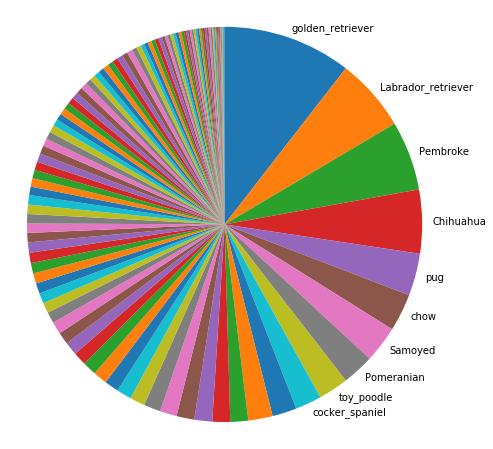

In [112]:
plt.figure(figsize=(8,8))
labels_list = np.full(len(dog_breed_value_counts.index),"",dtype=object)
labels_list[0:10] = dog_breed_value_counts.index[0:10]
plt.pie(dog_breed_value_counts.value_counts, labels = labels_list, startangle = 90,
        counterclock = False,labeldistance=1.05);
plt.axis('square');

In [113]:
def category_plot(df_final, str_category, str_title):
    type_counts = df_final[str_category].value_counts()
    plt.figure(figsize=(10,8))
    sns.set(style="whitegrid", font_scale=1.5); 
    sns.countplot(data = df_final, x = str_category, color = 'tab:blue', order=type_counts.index);
    n_points = df_final.shape[0]
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        #get the text property for the label to get the correct count
        count = type_counts[label.get_text()]
        count_string = '{:,}'.format(count)
        pct_string = '{:0.2f}%'.format(100*count/n_points)
        full_string = count_string + ' (' + pct_string + ')' 

        # print the annotation just below the top of the bar
        plt.text(loc, count+10, full_string, fontsize=13, ha = 'center')
    plt.title(str_title);

### The Distribution of Stages of Dogs :

In [114]:
stage_value_counts = df_final.stage.value_counts().to_frame()
stage_value_counts.rename(columns={'stage':'value_counts'},inplace=True)
stage_value_counts.index.name='stage'
stage_value_counts

,value_counts
stage,
unclassified,908
pup,346
doggo,41
floofer,5
woof,4


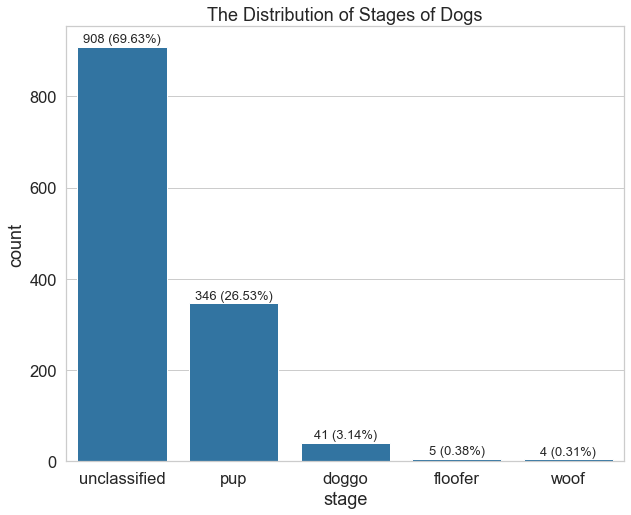

In [115]:
category_plot(df_final, 'stage', 'The Distribution of Stages of Dogs')

### The Distribution of Prediction Algorithms :

In [116]:
prediction_algorithm_value_counts = df_final.prediction_algorithm.value_counts().to_frame()
prediction_algorithm_value_counts.rename(columns={'prediction_algorithm':'value_counts'},inplace=True)
prediction_algorithm_value_counts.index.name='prediction_algorithm'
prediction_algorithm_value_counts

,value_counts
prediction_algorithm,
P_1,1148
P_2,106
P_3,50


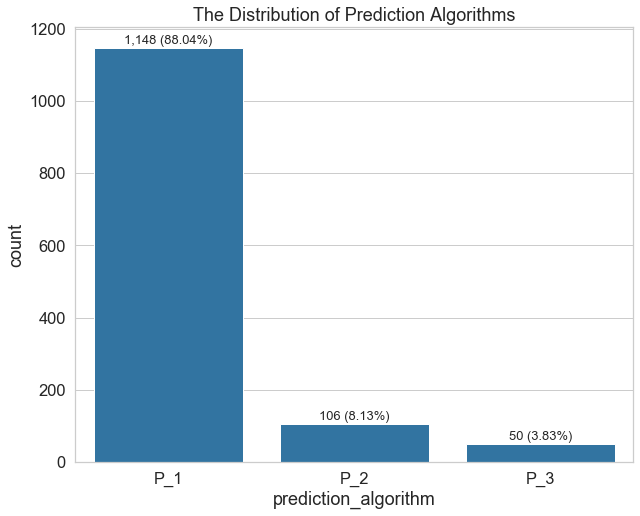

In [117]:
category_plot(df_final, 'prediction_algorithm', 'The Distribution of Prediction Algorithms')

### Average Confidance for Prediction Algorithms :

In [118]:
df_final.groupby(['prediction_algorithm'])[['algorithm_conf']].mean()

,algorithm_conf
prediction_algorithm,
P_1,0.621783
P_2,0.122478
P_3,0.049857


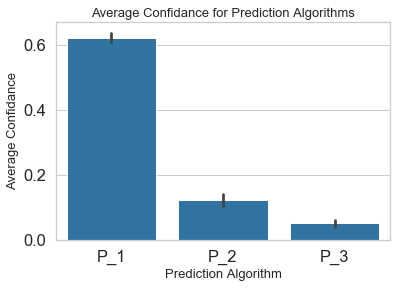

In [119]:
sns.barplot(x='prediction_algorithm', y='algorithm_conf', data=df_final, color = 'tab:blue');
plt.xlabel('Prediction Algorithm', fontsize=13);
plt.ylabel('Average Confidance', fontsize=13);
plt.title('Average Confidance for Prediction Algorithms', fontsize=13);

#### Comment: from `The Distribution of Prediction Algorithms` and `Average Confidance for Prediction Algorithms ` :
- #1 prediction algorithm got involved in about `88.04 %` in predicting the most correct breed with average confidance about `62 %`
- #2 prediction algorithm got involved in about `8.13 %` in predicting the most correct breed with average confidance about `12 %`
- #3 prediction algorithm got involved in about `3.83 %` in predicting the most correct breed with average confidance about `5 %`

### The Distribution of Images Number :

In [120]:
img_num_value_counts = df_final.img_num.value_counts().to_frame()
img_num_value_counts.rename(columns={'img_num':'value_counts'},inplace=True)
img_num_value_counts.index.name='img_num'
img_num_value_counts

,value_counts
img_num,
img_1,1082
img_2,148
img_3,52
img_4,22


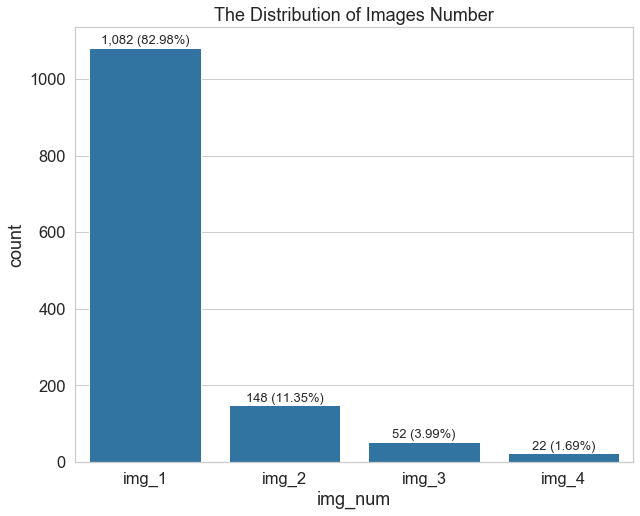

In [121]:
category_plot(df_final, 'img_num', 'The Distribution of Images Number')

### Average Confidance for Image Number :

In [122]:
df_final.groupby(['img_num'])[['algorithm_conf']].mean()

,algorithm_conf
img_num,
img_1,0.540728
img_2,0.631417
img_3,0.625300
img_4,0.829510


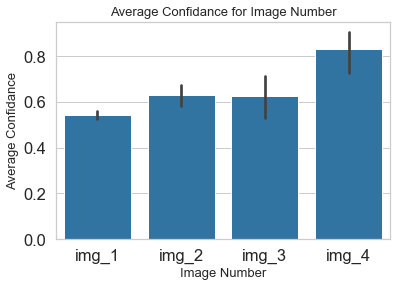

In [123]:
sns.barplot(x='img_num', y='algorithm_conf', data=df_final, color = 'tab:blue');
plt.xlabel('Image Number', fontsize=13);
plt.ylabel('Average Confidance', fontsize=13);
plt.title('Average Confidance for Image Number', fontsize=13);

#### Comment: from `The Distribution of Images Number` and `Average Confidance for Image Number` :
- about `83 %` of image #1 has average confidance about `54 %`
- about `11.35 %` of image #1 has average confidance about `63 %`
- about `4 %` of image #1 has average confidance about `62.5 %`
- about `1.7 %` of image #1 has average confidance about `83 %`

### Prediction Algorithms and Image Number:

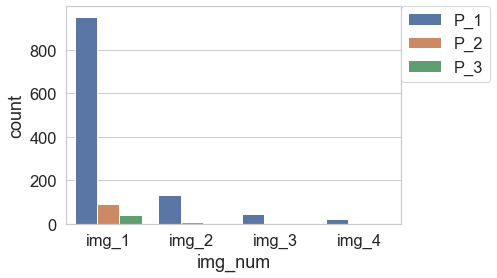

In [124]:
sns.countplot(data = df_final, x = 'img_num', hue='prediction_algorithm', order=df_final.img_num.value_counts().index);
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

### Average Confidance corresponding to Prediction Algorithms and Image Number:

In [125]:
df_final.groupby(['img_num','prediction_algorithm'])[['algorithm_conf']].mean().fillna(0)

algorithm_conf
img_num prediction_algorithm                
img_1   P_1                         0.599751
        P_2                         0.132459
        P_3                         0.054584
img_2   P_1                         0.702210
        P_2                         0.056392
        P_3                         0.032339
img_3   P_1                         0.744472
        P_2                         0.082903
        P_3                         0.001966
img_4   P_1                         0.863793
        P_2                         0.000000
        P_3                         0.109570

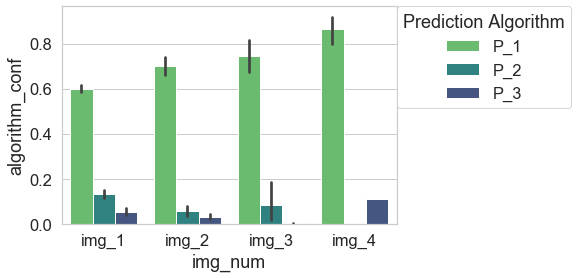

In [126]:
sns.barplot(data = df_final, x='img_num' , y='algorithm_conf', hue='prediction_algorithm', palette = 'viridis_r',
            order=df_final.img_num.value_counts().index);
plt.legend(title = 'Prediction Algorithm',bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

## Numerical Variables :

In [127]:
df_final.describe()

,algorithm_conf,rating_numerator,retweet_count,favorite_count
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,0.559266,11.165475,2983.199387,9743.056748
std,0.296496,1.797979,4427.091745,12747.669737
min,0.000062,0.000000,73.000000,0.000000
25%,0.319794,10.000000,793.750000,2407.000000
50%,0.568799,11.000000,1672.000000,4710.500000
75%,0.829344,12.000000,3419.250000,12703.250000
max,0.999953,34.000000,56561.000000,132712.000000


### Retweet Count Distribution:

In [128]:
np.log10(df_final[['retweet_count','favorite_count']].describe())

C:\Users\El Zahraa\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count
count,3.115278,3.115278
mean,3.474682,3.988695
std,3.646119,4.105431
min,1.863323,-inf
25%,2.899684,3.381476
50%,3.223236,3.673067
75%,3.533931,4.103915
max,4.752517,5.122910


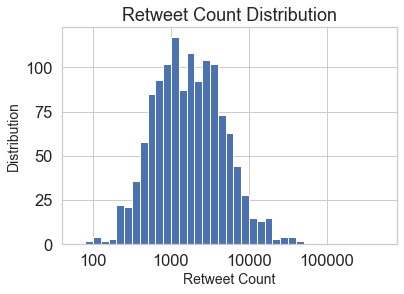

In [129]:
bins_edge = 10**np.arange(1.8, np.log10(df_final.retweet_count.max())+1, 0.1)
plt.hist(data=df_final, x='retweet_count', bins=bins_edge);
ticks = [10**x for x in range(2,6)]
labels = ['{}'.format(x) for x in ticks]
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlabel('Retweet Count', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.title('Retweet Count Distribution');

#### Comment: Distribution of `Retweet Count` is unimodal and symmetric, it has about the same shape on either side of the middle. 

### Favorite Count Distribution:

In [130]:
np.log10(df_final.favorite_count.drop_duplicates().nsmallest(5))

C:\Users\El Zahraa\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


29          -inf
1234    2.796574
1199    2.797268
1243    2.824126
1275    2.840733
Name: favorite_count, dtype: float64

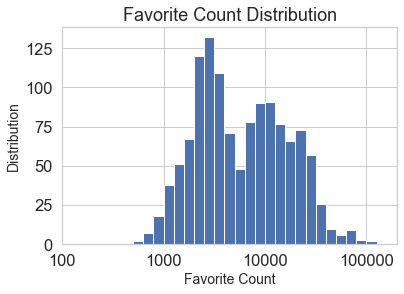

In [131]:
bins_edge = 10**np.arange(2.7, np.log10(df_final.favorite_count.max())+1, 0.1)
plt.hist(data=df_final, x='favorite_count', bins=bins_edge); #favorite_count
plt.xscale('log');
ticks = [10**x for x in range(2,6)]
labels = ['{}'.format(x) for x in ticks]
plt.xscale('log');
plt.xlim(right=10**5+10**5);
plt.xticks(ticks, labels);
plt.xlabel('Favorite Count', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.title('Favorite Count Distribution');

#### Comment: Distribution of `Favorite Count` is roughly bimodal and skewed to right, with one large peak somewhere between 4 and 5 thousand, and a second median peak about 10 thousand. 

### Rating Numerator Distribution:

In [132]:
df_final.rating_numerator.value_counts()

12.00    385
11.00    282
10.00    232
13.00    221
9.00      84
8.00      33
14.00     25
7.00      14
5.00       7
6.00       7
2.00       4
3.00       4
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
34.00      1
Name: rating_numerator, dtype: int64

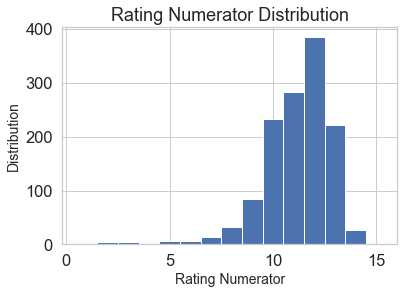

In [133]:
bins_edge = np.arange(df_final.rating_numerator.min(), 14+1, 1)
plt.hist(data=df_final, x='rating_numerator', bins=bins_edge+0.5);
plt.xlim(right=16);
plt.xlabel('Rating Numerator', fontsize=14);
plt.ylabel('Distribution', fontsize=14);
plt.title('Rating Numerator Distribution');

#### Comment 1 : Distribution of `Rating` is unimodal and skewed to left
#### Comment 2 : Rating is based on dog's owner not audience, so it won't be fair if we use rating variable  to determine best dog rating.  also, we shouldn't involve rating variable in bivariate exploration

### Relation between Retweet Count and Favorite Count:

In [134]:
df_final[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.846324
favorite_count,0.846324,1.000000


#### Comment: strong positive correlation between these two variables

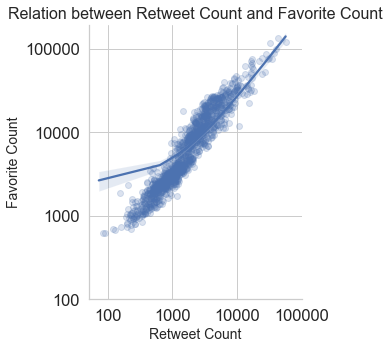

In [135]:
sns.lmplot(x="retweet_count", y="favorite_count", data = df_final,scatter_kws = {'alpha':0.2});
plt.xscale('log');
plt.yscale('log');
xlocs = [10**x for x in range(2,6)]
xlabels = ['{}'.format(x) for x in ticks]
ylocs = [10**x for x in range(2,6)]
ylabels = ['{}'.format(x) for x in ticks]
plt.xticks(xlocs, xlabels);
plt.yticks(ylocs, ylabels);
plt.xlabel('Retweet Count', fontsize=14);
plt.ylabel('Favorite Count', fontsize=14);
plt.title('Relation between Retweet Count and Favorite Count', fontsize=16);

#### Comment: `Retweet Count` is proportional to `Favorite Count` as shown, and this confirms the positive correlation between these two variables 